In [7]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
# Make file path variable so that all we need is to change this if we move notebook location
file_path = '../data/processed/final_HDB_for_model.parquet.gzip'

# Read data into csv
df = pd.read_parquet(file_path)
df = df.sample(500000)

# Put all columns to be deleted into a list
drop_cols = ['block', 'street_name','address','sold_year_month']

# Drop columns
df = df.drop(columns=drop_cols)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 309392 to 104828
Data columns (total 23 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   town                                                                           500000 non-null  object 
 1   flat_type                                                                      500000 non-null  object 
 2   storey_range                                                                   500000 non-null  object 
 3   floor_area_sqm                                                                 500000 non-null  float64
 4   flat_model                                                                     500000 non-null  object 
 5   lease_commence_date                                                            500000 non-null  int64  
 6   resale_

In [41]:
from pycaret.regression import *

In [42]:
reg = setup(data = df, target = 'resale_price', max_encoding_ohe = 200, fold = 5)

,Description,Value
0,Session id,5994
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(500000, 23)"
4,Transformed data shape,"(500000, 196)"
5,Transformed train set shape,"(350000, 196)"
6,Transformed test set shape,"(150000, 196)"
7,Numeric features,17
8,Categorical features,5
9,Preprocess,True


In [43]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15517.7314,515899792.8700,22713.1349,0.9810,0.0819,0.0561,127.9880
rf,Random Forest Regressor,15725.8886,555522543.7145,23569.4519,0.9795,0.0797,0.0554,96.2520
lightgbm,Light Gradient Boosting Machine,19658.5414,784646996.5469,28010.7542,0.9710,0.0986,0.0706,2.0020
dt,Decision Tree Regressor,21889.8937,1100011797.2640,33165.4176,0.9594,0.1099,0.0761,2.9760
gbr,Gradient Boosting Regressor,29612.4476,1855909885.8181,43079.7618,0.9315,0.1438,0.1036,24.0520
lr,Linear Regression,38879.7754,2720826108.8700,52161.3497,0.8996,0.2595,0.1619,3.9700
ridge,Ridge Regression,38879.2435,2720831262.0382,52161.3957,0.8996,0.2591,0.1618,1.3360
br,Bayesian Ridge,38879.1594,2720798908.8651,52161.0869,0.8996,0.2594,0.1618,4.4220
lasso,Lasso Regression,38971.3401,2729190561.5873,52241.4731,0.8993,0.2611,0.1624,39.5700
llar,Lasso Least Angle Regression,39171.5267,2772087463.3142,52647.8921,0.8977,0.2575,0.1628,1.2880


ExtraTreesRegressor(n_jobs=-1, random_state=5994)

In [31]:
regression_model_linear = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40030.8205,2894823339.7751,53803.5625,0.8956,0.2575,0.1730
1,39198.7705,2795596006.4815,52873.3960,0.8953,0.2303,0.1657
2,39606.5840,2814921464.0182,53055.8335,0.8990,0.2889,0.1627
3,39693.1019,2782636606.0579,52750.7024,0.8997,0.2449,0.1618
4,39865.5522,2826714093.7170,53166.8515,0.8998,0.2499,0.1610
5,40385.3475,2978261625.0133,54573.4517,0.8960,0.2627,0.1610
6,38995.9311,2740122880.5899,52346.1831,0.8961,0.2738,0.1677
7,38317.0976,2647007999.3505,51449.0816,0.9021,0.2660,0.1584
8,38855.7144,2699289820.4445,51954.6901,0.9042,0.2476,0.1583


In [32]:
regression_model_linear_hyp = tune_model(regression_model_linear, n_iter=5, optimize='r2', fold =5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:28:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,39640.5952,2848183644.1609,53368.3768,0.8954,0.2458,0.1696
1,39627.0353,2799682191.0997,52912.0231,0.8994,0.2624,0.1620
2,40179.1412,2909640984.9942,53941.0881,0.8976,0.2574,0.1611
3,38679.4895,2696342218.1883,51926.3153,0.8990,0.2778,0.1633
4,39377.0140,2812051970.0707,53028.7844,0.8989,0.2581,0.1642
Mean,39500.6550,2813180201.7028,53035.3175,0.8981,0.2603,0.1641
Std,486.9289,69806170.6236,659.7695,0.0015,0.0103,0.0030


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


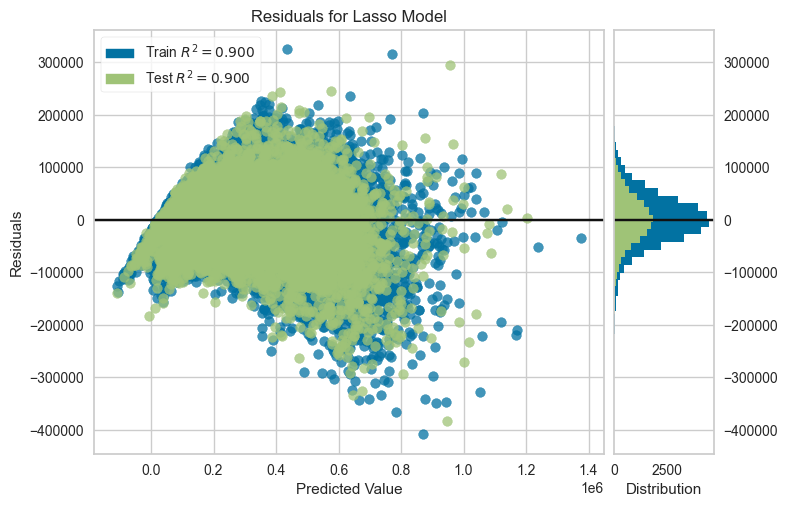

In [33]:
plot_model(regression_model_linear)